In [56]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu
from anon import id2nome, nome2id, control_list, experimental_list

from pathlib import Path

import unicodedata

In [57]:
nome2id_lower = {k.lower(): v for k, v in nome2id.items()}

In [58]:
data_path = Path('../data')

imi_risk_guard = pd.read_excel(data_path / 'IMI_RiskGuard_Anon.xlsx')

imi_tradicional = pd.read_excel(data_path / 'IMI_TradictioalLecture_Anon.xlsx')


In [59]:
import json
def remover_acentos(texto: str) -> str:
    # Normaliza para decompor acentos em caracteres separados
    nfkd = unicodedata.normalize("NFD", texto)
    # Remove todos os caracteres que são marcas diacríticas (Mn = Mark, Nonspacing)
    return "".join([c for c in nfkd if unicodedata.category(c) != "Mn"])

control = imi_tradicional[imi_tradicional['Qual o seu nome completo?'].isin(control_list)]
experimental = imi_risk_guard[imi_risk_guard['Qual o seu nome completo?'].isin(experimental_list)]
experimental_pre_game = imi_tradicional[imi_tradicional['Qual o seu nome completo?'].isin(experimental_list)]

experimental = experimental.sort_values(by='Qual o seu nome completo?')
experimental_pre_game = experimental_pre_game.sort_values(by='Qual o seu nome completo?')

control = control.drop(columns=['Qual o seu nome completo?', 'Carimbo de data/hora'], axis=1)
experimental = experimental.drop(columns=['Qual o seu nome completo?', 'Carimbo de data/hora'], axis=1)
experimental_pre_game = experimental_pre_game.drop(columns=['Qual o seu nome completo?', 'Carimbo de data/hora'], axis=1)

In [60]:
imi_risk_guard.columns

Index(['Carimbo de data/hora', 'Qual o seu nome completo?',
       'Eu gostei muito de fazer a atividade.',
       'Eu me esforcei/dediquei bastante para realizar a atividade.',
       'Essa foi uma atividade que não consegui fazer muito bem.',
       'Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.',
       'Eu estava ansioso enquanto trabalhava na atividade.',
       'Eu descreveria a atividade como muito interessante.',
       'Acho que me saí muito bem na atividade em comparação a outros alunos.',
       'Acho que essa é uma atividade importante.',
       'Não me esforcei muito em ir bem na atividade.',
       'A atividade não prendeu/manteve minha atenção de forma alguma.',
       'Eu fui bastante competente na atividade.',
       'Acredito que ter feito essa atividade foi benefica para mim.',
       'Eu me sinto muito tenso ao fazer a atividade.',
       'Achei a atividade bastante agradável.',
       'Ter reali

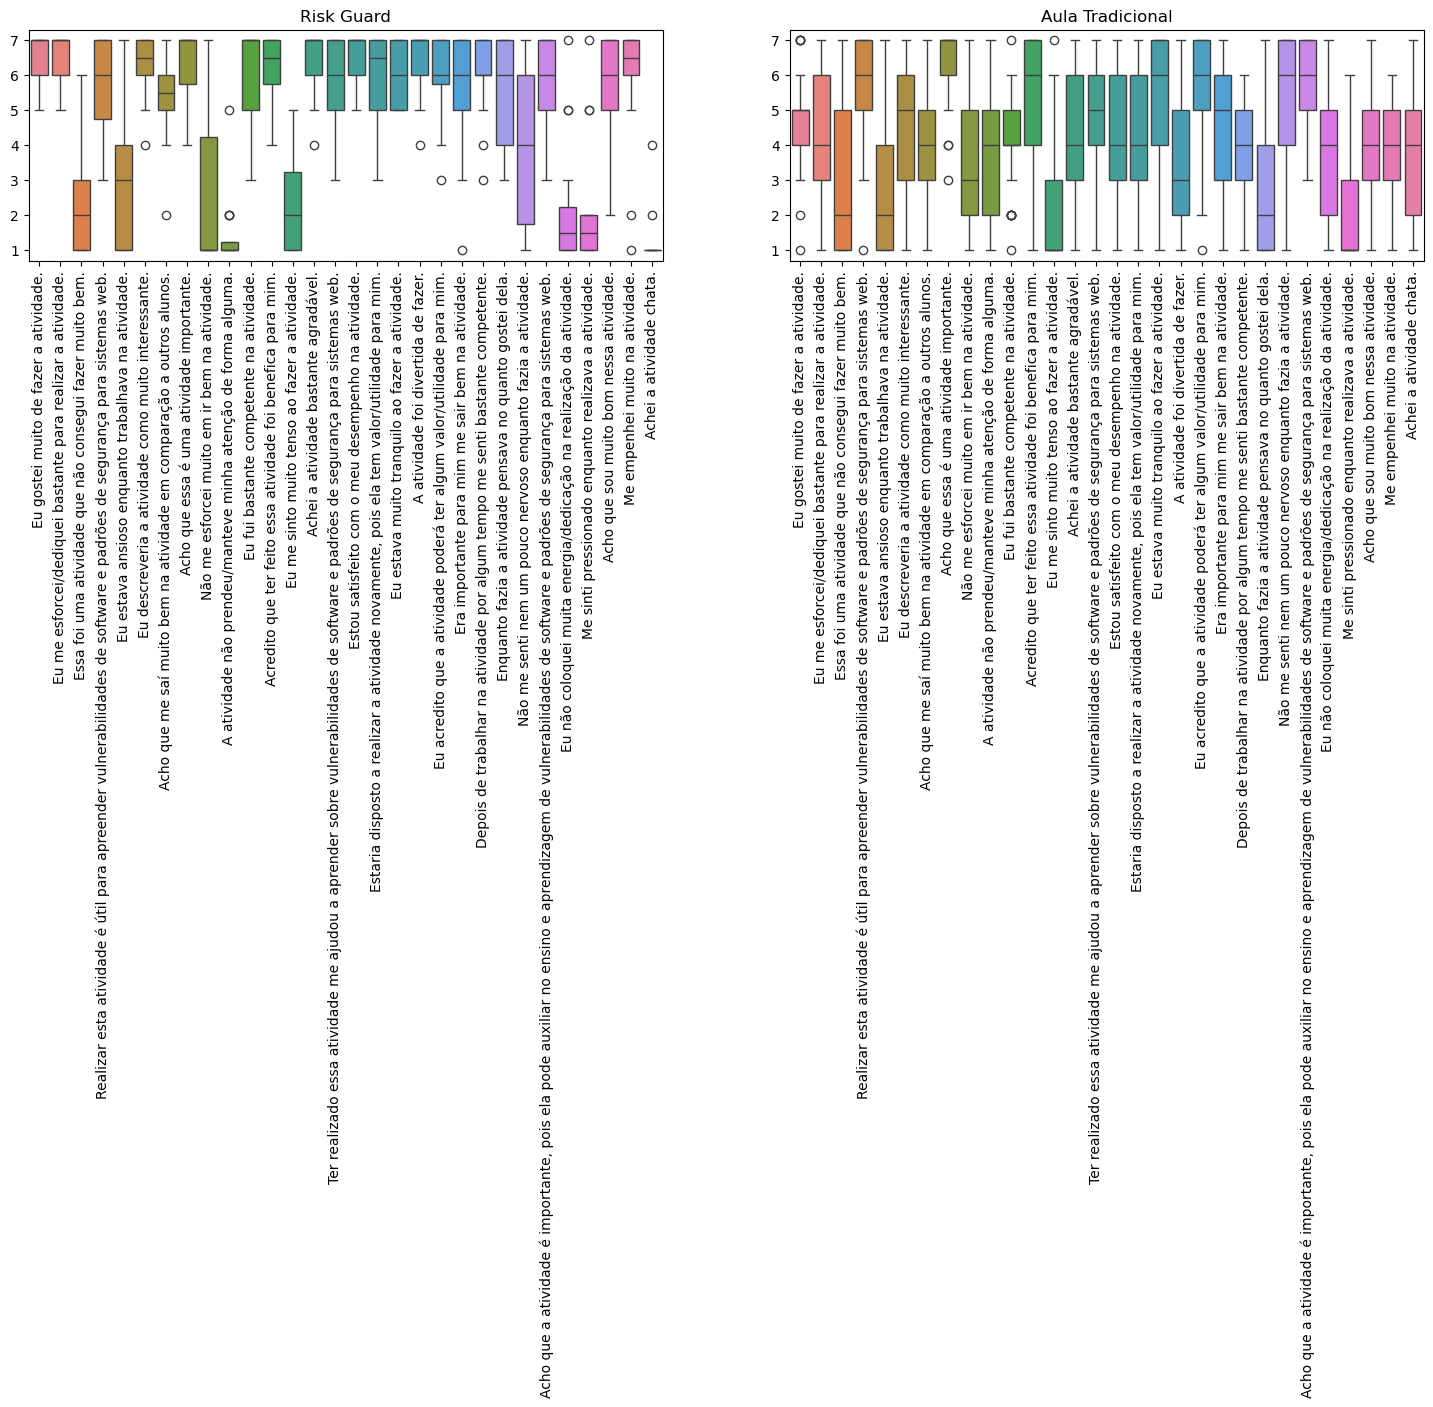

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(data=imi_risk_guard, ax=ax[0])
ax[0].set_title("Risk Guard")
ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=imi_tradicional, ax=ax[1])
ax[1].set_title("Aula Tradicional")
ax[1].tick_params(axis='x', rotation=90)

plt.show()

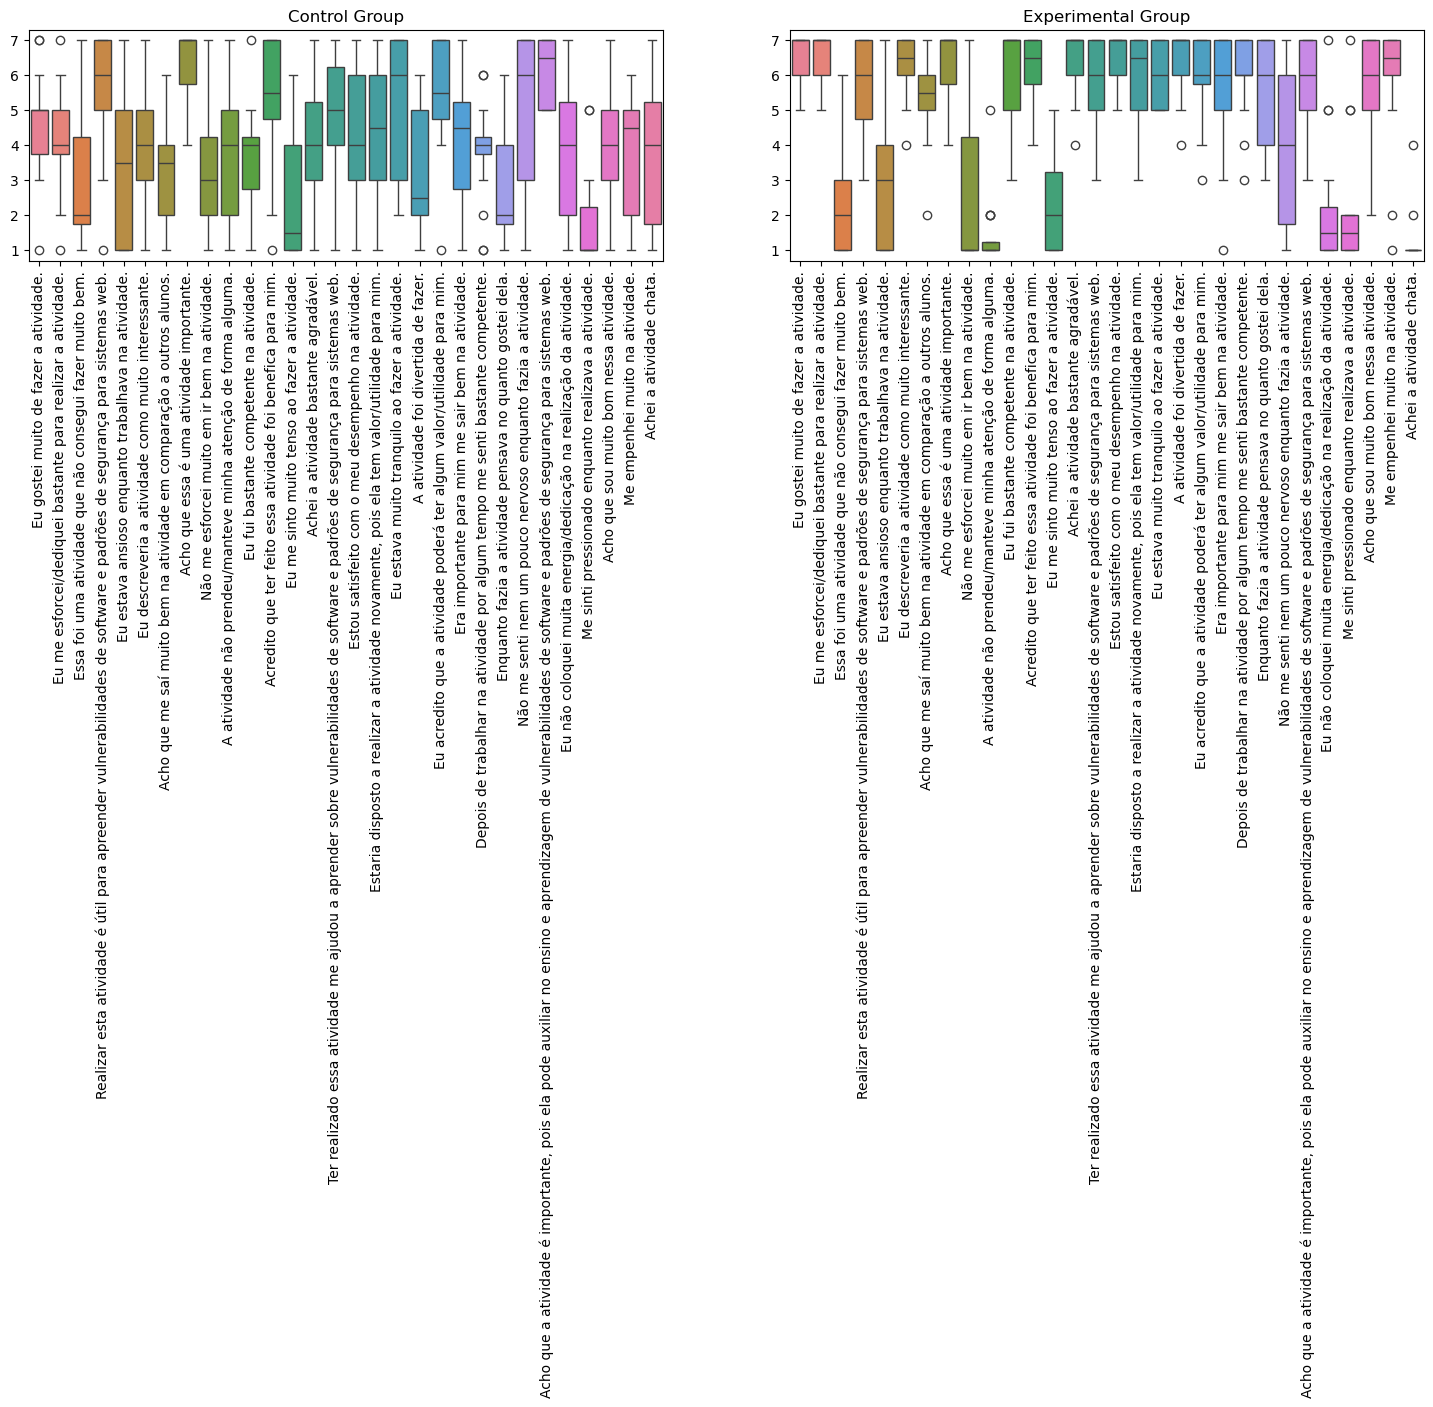

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(data=control, ax=ax[0])
ax[0].set_title("Control Group")
ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=experimental, ax=ax[1])
ax[1].set_title("Experimental Group")
ax[1].tick_params(axis='x', rotation=90)

plt.show()

In [63]:
new_cols = {"A atividade não prendeu/manteve minha atenção de forma alguma." : "A atividade não prendeu/manteve minha atenção de forma alguma. (R)",
           'Achei a atividade chata.' : 'Achei a atividade chata. (R)',
           'Essa foi uma atividade que não consegui fazer muito bem.' : 'Essa foi uma atividade que não consegui fazer muito bem. (R)',
           'Não me esforcei muito em ir bem na atividade.': 'Não me esforcei muito em ir bem na atividade. (R)',
           'Eu não coloquei muita energia/dedicação na realização da atividade.' : 'Eu não coloquei muita energia/dedicação na realização da atividade. (R)',
            }

control = control.rename(columns=new_cols)
experimental = experimental.rename(columns=new_cols)
experimental_pre_game = experimental_pre_game.rename(columns=new_cols)

In [64]:
interest_enjoyment_columns = ['Eu gostei muito de fazer a atividade.', 'Eu descreveria a atividade como muito interessante.', "A atividade não prendeu/manteve minha atenção de forma alguma. (R)",
                              'Achei a atividade bastante agradável.', 'A atividade foi divertida de fazer.', 'Enquanto fazia a atividade pensava no quanto gostei dela.', 
                              'Achei a atividade chata. (R)']

perceived_competence_columns = ['Essa foi uma atividade que não consegui fazer muito bem. (R)', 'Acho que me saí muito bem na atividade em comparação a outros alunos.', 'Acho que sou muito bom nessa atividade.',
               'Estou satisfeito com o meu desempenho na atividade.', 'Depois de trabalhar na atividade por algum tempo me senti bastante competente.', 'Eu fui bastante competente na atividade.']

effort_importance_columns = ['Eu me esforcei/dediquei bastante para realizar a atividade.', 'Não me esforcei muito em ir bem na atividade. (R)', 'Era importante para mim me sair bem na atividade.', 
               "Eu não coloquei muita energia/dedicação na realização da atividade. (R)", 'Me empenhei muito na atividade.']

value_usefulness_columns = ['Acho que essa é uma atividade importante.', 'Ter realizado essa atividade me ajudou a aprender sobre vulnerabilidades de software e padrões de segurança para sistemas web.',
               'Acho que a atividade é importante, pois ela pode auxiliar no ensino e aprendizagem de vulnerabilidades de software e padrões de segurança para sistemas web.',
               'Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.', 'Eu acredito que a atividade poderá ter algum valor/utilidade para mim.',
               'Estaria disposto a realizar a atividade novamente, pois ela tem valor/utilidade para mim.', 'Acredito que ter feito essa atividade foi benefica para mim.']

pressure_tension_columns = ['Eu estava ansioso enquanto trabalhava na atividade.', 'Eu me sinto muito tenso ao fazer a atividade.', 'Eu estava muito tranquilo ao fazer a atividade.',
                'Me sinti pressionado enquanto realizava a atividade.', 'Não me senti nem um pouco nervoso enquanto fazia a atividade.']

all_cols = interest_enjoyment_columns + perceived_competence_columns + effort_importance_columns + value_usefulness_columns + pressure_tension_columns

In [65]:
# the score of an item was the value attributed to it by the participant, except for items with reverse meaning, whose
# score corresponded to the modulus of the outcome of subtracting the value chosen by the participant from the constant 8 
# (e.g., the score of a reverse item valued 2 was |2 − 8| = 6);

control_test = control.copy()
experimental_test = experimental.copy()
experimental_pre_game_test = experimental_pre_game.copy()

for col in control_test.columns:
    if "(R)" in col:
        control_test[col] = (control_test[col] - 8).abs()
        experimental_test[col] = (experimental_test[col] - 8).abs()
        experimental_pre_game_test[col] = (experimental_pre_game_test[col] - 8).abs()

In [66]:
experimental_test

,Eu gostei muito de fazer a atividade.,Eu me esforcei/dediquei bastante para realizar a atividade.,Essa foi uma atividade que não consegui fazer muito bem. (R),Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.,Eu estava ansioso enquanto trabalhava na atividade.,Eu descreveria a atividade como muito interessante.,Acho que me saí muito bem na atividade em comparação a outros alunos.,Acho que essa é uma atividade importante.,Não me esforcei muito em ir bem na atividade. (R),A atividade não prendeu/manteve minha atenção de forma alguma. (R),...,Era importante para mim me sair bem na atividade.,Depois de trabalhar na atividade por algum tempo me senti bastante competente.,Enquanto fazia a atividade pensava no quanto gostei dela.,Não me senti nem um pouco nervoso enquanto fazia a atividade.,"Acho que a atividade é importante, pois ela pode auxiliar no ensino e aprendizagem de vulnerabilidades de software e padrões de segurança para sistemas web.",Eu não coloquei muita energia/dedicação na realização da atividade. (R),Me sinti pressionado enquanto realizava a atividade.,Acho que sou muito bom nessa atividade.,Me empenhei muito na atividade.,Achei a atividade chata. (R)
8,7,5,7,6,4,7,7,7,7,7,...,7,7,7,1,7,7,1,7,7,7
12,5,5,5,4,2,5,5,4,6,6,...,3,3,3,6,5,3,2,3,2,6
13,7,7,7,7,4,7,6,7,7,7,...,5,7,7,4,6,6,5,6,7,7
6,7,7,7,6,5,7,6,7,1,7,...,7,7,7,2,7,1,7,7,7,7
3,5,7,3,3,1,6,5,5,7,7,...,7,4,3,6,5,7,1,5,7,7
4,6,6,7,6,1,5,5,7,4,6,...,1,5,3,1,3,3,1,5,1,7
7,7,5,5,4,3,6,2,4,3,7,...,3,6,4,6,5,5,1,2,5,7
0,6,6,6,7,4,6,6,6,6,6,...,5,6,6,4,6,6,5,6,6,7
5,6,7,7,3,1,4,5,4,7,7,...,6,6,4,7,4,7,1,7,7,4
10,7,6,6,5,5,7,5,6,7,7,...,6,6,5,4,6,7,2,5,6,7


In [67]:
control_test

,Eu gostei muito de fazer a atividade.,Eu me esforcei/dediquei bastante para realizar a atividade.,Essa foi uma atividade que não consegui fazer muito bem. (R),Realizar esta atividade é útil para apreender vulnerabilidades de software e padrões de segurança para sistemas web.,Eu estava ansioso enquanto trabalhava na atividade.,Eu descreveria a atividade como muito interessante.,Acho que me saí muito bem na atividade em comparação a outros alunos.,Acho que essa é uma atividade importante.,Não me esforcei muito em ir bem na atividade. (R),A atividade não prendeu/manteve minha atenção de forma alguma. (R),...,Era importante para mim me sair bem na atividade.,Depois de trabalhar na atividade por algum tempo me senti bastante competente.,Enquanto fazia a atividade pensava no quanto gostei dela.,Não me senti nem um pouco nervoso enquanto fazia a atividade.,"Acho que a atividade é importante, pois ela pode auxiliar no ensino e aprendizagem de vulnerabilidades de software e padrões de segurança para sistemas web.",Eu não coloquei muita energia/dedicação na realização da atividade. (R),Me sinti pressionado enquanto realizava a atividade.,Acho que sou muito bom nessa atividade.,Me empenhei muito na atividade.,Achei a atividade chata. (R)
0,4,4,3,5,7,3,3,5,3,4,...,7,4,2,3,5,3,5,3,2,2
7,7,6,2,7,5,5,5,7,5,4,...,3,6,4,2,7,5,2,3,5,6
9,3,3,7,6,7,3,4,7,3,3,...,6,4,3,3,7,6,5,4,3,3
11,6,4,4,7,2,3,3,6,4,2,...,3,4,2,6,6,2,3,3,4,2
12,1,1,7,3,1,1,5,4,1,1,...,1,1,1,7,5,1,1,7,1,1
13,5,4,6,6,5,6,1,7,3,6,...,7,5,5,6,7,6,1,4,6,7
15,5,5,7,7,4,5,2,7,5,3,...,5,4,3,6,7,4,1,5,5,4
16,5,6,6,1,3,4,4,7,6,3,...,5,4,2,7,5,5,1,4,5,4
17,3,4,6,5,2,3,2,6,7,2,...,3,3,2,6,5,2,1,2,2,3
19,5,4,6,6,6,5,4,5,5,5,...,4,4,4,3,6,4,3,4,4,5


In [68]:
## the result of a participant for a given IMI subscale corresponded to the mean of the scores obtained for its items;

# control
control_test['interest_enjoyment'] = control_test[interest_enjoyment_columns].mean(axis=1)
control_test['perceived_competence'] = control_test[perceived_competence_columns].mean(axis=1)
control_test['effort_importance'] = control_test[effort_importance_columns].mean(axis=1)
control_test['value_usefulness'] = control_test[value_usefulness_columns].mean(axis=1)
control_test['pressure_tension'] = control_test[pressure_tension_columns].mean(axis=1)

control_test = control_test.drop(columns=all_cols)

# experimental
experimental_test['interest_enjoyment'] = experimental_test[interest_enjoyment_columns].mean(axis=1)
experimental_test['perceived_competence'] = experimental_test[perceived_competence_columns].mean(axis=1)
experimental_test['effort_importance'] = experimental_test[effort_importance_columns].mean(axis=1)
experimental_test['value_usefulness'] = experimental_test[value_usefulness_columns].mean(axis=1)
experimental_test['pressure_tension'] = experimental_test[pressure_tension_columns].mean(axis=1)

experimental_test = experimental_test.drop(columns=all_cols)

experimental_pre_game_test['interest_enjoyment'] = experimental_pre_game_test[interest_enjoyment_columns].mean(axis=1)
experimental_pre_game_test['perceived_competence'] = experimental_pre_game_test[perceived_competence_columns].mean(axis=1)
experimental_pre_game_test['effort_importance'] = experimental_pre_game_test[effort_importance_columns].mean(axis=1)
experimental_pre_game_test['value_usefulness'] = experimental_pre_game_test[value_usefulness_columns].mean(axis=1)
experimental_pre_game_test['pressure_tension'] = experimental_pre_game_test[pressure_tension_columns].mean(axis=1)

experimental_pre_game_test = experimental_pre_game_test.drop(columns=all_cols)

control_test['general_motivation'] = control_test['interest_enjoyment'] + control_test['perceived_competence'] + control_test['effort_importance'] + control_test['value_usefulness'] - control_test['pressure_tension']
experimental_test['general_motivation'] = experimental_test['interest_enjoyment'] + experimental_test['perceived_competence'] + experimental_test['effort_importance'] + experimental_test['value_usefulness'] - experimental_test['pressure_tension']
experimental_pre_game_test['general_motivation'] = experimental_pre_game_test['interest_enjoyment'] + experimental_pre_game_test['perceived_competence'] + experimental_pre_game_test['effort_importance'] + experimental_pre_game_test['value_usefulness'] - experimental_pre_game_test['pressure_tension']

## Control Vs Experimental

In [69]:
control_test.copy()

,interest_enjoyment,perceived_competence,effort_importance,value_usefulness,pressure_tension,general_motivation
0,2.857143,3.000000,3.8,5.571429,4.4,10.828571
7,5.285714,4.500000,4.8,6.000000,3.6,16.985714
9,2.857143,4.333333,4.2,6.428571,4.6,13.219048
11,3.142857,3.333333,3.4,5.142857,4.2,10.819048
12,1.000000,5.666667,1.0,2.285714,3.4,6.552381
13,5.714286,4.000000,5.2,6.571429,3.8,17.685714
15,3.714286,4.500000,4.8,6.142857,3.2,15.957143
16,3.857143,4.500000,5.4,4.857143,3.6,15.014286
17,2.428571,3.333333,3.6,5.285714,3.4,11.247619
19,4.428571,4.333333,4.2,5.142857,4.0,14.104762


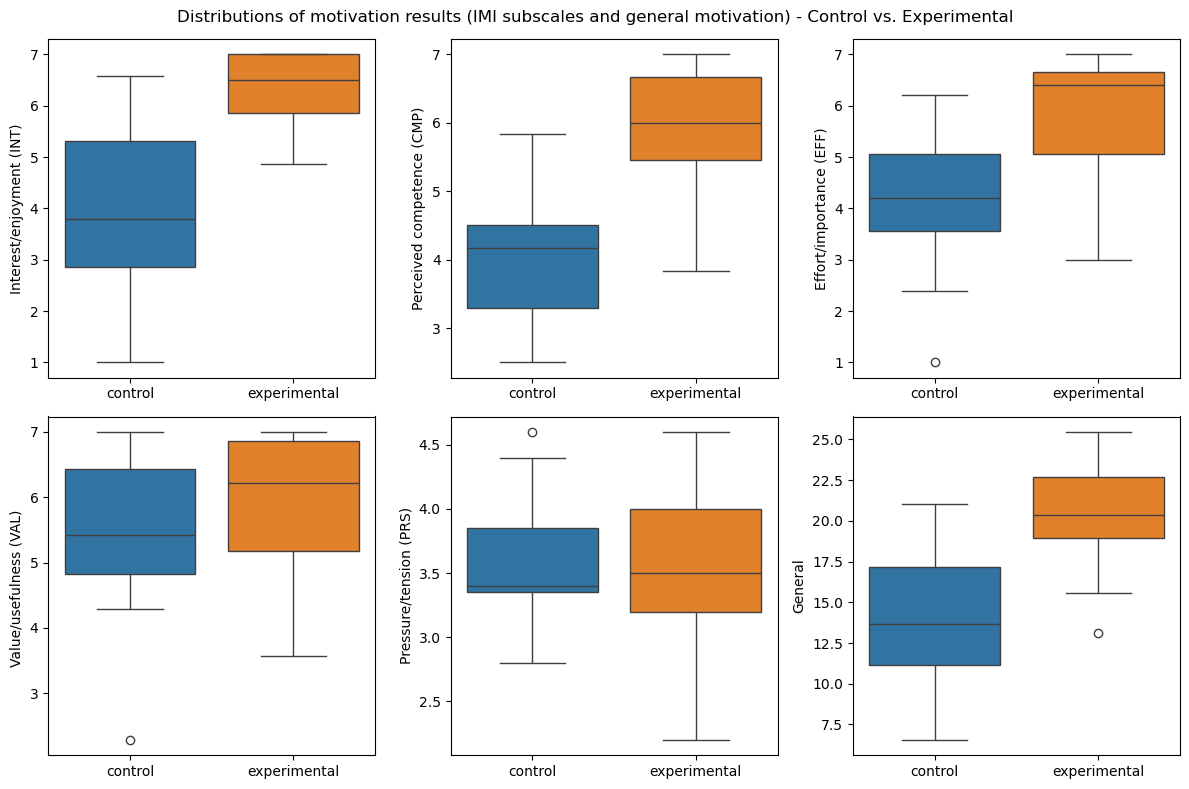

In [70]:
## boxplots

temp_control = control_test.copy()
temp_control['group'] = 'control'
temp_experimental = experimental_test.copy()
temp_experimental['group'] = 'experimental'
all = pd.concat([temp_control, temp_experimental], axis=0)


exp_general = experimental_test.mean(axis=1).to_frame()
exp_general.columns = ['general']
exp_general['group'] = 'experimental'

control_general = control_test.mean(axis=1).to_frame()
control_general.columns = ['general']
control_general['group'] = 'control'
general = pd.concat([control_general, exp_general], axis=0)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

sns.boxplot(x='group', y='interest_enjoyment', hue='group', data=all, ax=axs[0, 0])
axs[0, 0].set_ylabel('Interest/enjoyment (INT)')
axs[0, 0].set_xlabel('')

sns.boxplot(x='group', y='perceived_competence', hue='group', data=all, ax=axs[0, 1])
axs[0, 1].set_ylabel('Perceived competence (CMP)')
axs[0, 1].set_xlabel('')

sns.boxplot(x='group', y='effort_importance', hue='group', data=all, ax=axs[0, 2])
axs[0, 2].set_ylabel('Effort/importance (EFF)')
axs[0, 2].set_xlabel('')

sns.boxplot(x='group', y='value_usefulness', hue='group', data=all, ax=axs[1, 0])
axs[1, 0].set_ylabel('Value/usefulness (VAL) ')
axs[1, 0].set_xlabel('')

sns.boxplot(x='group', y='pressure_tension', hue='group', data=all, ax=axs[1, 1])
axs[1, 1].set_ylabel('Pressure/tension (PRS)')
axs[1, 1].set_xlabel('')

sns.boxplot(x='group', y='general_motivation', hue='group', data=all, ax=axs[1, 2])
axs[1, 2].set_ylabel('General')
axs[1, 2].set_xlabel('')

plt.suptitle('Distributions of motivation results (IMI subscales and general motivation) - Control vs. Experimental')
plt.tight_layout()
figures_path = Path('../figures')
figures_path.mkdir(exist_ok=True)

plt.savefig(figures_path / 'boxplots_imi_control_x_exp.pdf', bbox_inches='tight', dpi=300)
plt.show()

### Realização dos testes

Há uma diferença significativa entre as médias entre os grupos?

- **H₀_i (Hipótese Nula):** Na subescala, a média das diferenças entre os grupos é zero (𝜇𝑑 = 0).
- **H₁_i (Hipótese Alternativa):** Na subescala, a média das diferenças entre os grupos é diferente de zero (𝜇𝑑 ≠ 0).

In [71]:
experimental_test

,interest_enjoyment,perceived_competence,effort_importance,value_usefulness,pressure_tension,general_motivation
8,7.000000,7.000000,6.6,6.857143,3.2,24.257143
12,4.857143,4.333333,3.8,3.714286,3.6,13.104762
13,7.000000,6.666667,6.4,6.857143,4.4,22.523810
6,7.000000,6.833333,4.6,6.857143,4.6,20.690476
3,5.857143,5.000000,7.0,4.571429,3.2,19.228571
4,5.857143,6.000000,3.0,5.285714,2.2,17.942857
7,6.285714,3.833333,4.2,4.857143,3.6,15.576190
0,6.000000,6.000000,5.8,6.142857,4.6,19.342857
5,4.857143,6.333333,6.8,3.571429,3.4,18.161905
10,6.714286,5.666667,6.4,6.000000,4.0,20.780952


In [72]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind
import numpy as np
import pandas as pd

# Teste de normalidade (com amostras grandes limitadas a 5000 para o Shapiro-Wilk)
def testar_normalidade(coluna, alpha=0.05):
    if len(coluna) > 5000:
        coluna = coluna.sample(5000, random_state=42)
    stat, p = shapiro(coluna)
    return p > alpha, p  # True = normal

# Tamanho do efeito de Cohen (positivo se experimental > controle)
def cohen_d(experimental, control):
    x, y = np.array(experimental), np.array(control)
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std  # experimental - controle

# Correlação bisserial de postos (positivo se experimental > controle)
def rank_biserial(experimental, control):
    u_stat, _ = mannwhitneyu(experimental, control, alternative="two-sided")
    n1, n2 = len(experimental), len(control)
    r = 1 - (2 * u_stat) / (n1 * n2)
    return r

# Interpretação qualitativa do tamanho de efeito
def interpretar_effect_size(valor, tipo):
    abs_val = abs(valor)
    if tipo == 'Cohen':
        if abs_val < 0.2:
            return "pequeno"
        elif abs_val < 0.5:
            return "médio"
        else:
            return "grande"
    elif tipo == 'RankBiserial':
        if abs_val < 0.1:
            return "pequeno"
        elif abs_val < 0.3:
            return "médio"
        else:
            return "grande"

# Interpretação do valor-p
def interpretar_p_valor(p, alpha=0.05):
    if p < alpha:
        return f"Diferença estatisticamente significativa (p = {p:.3f} < {alpha})"
    else:
        return f"Diferença **não significativa** (p = {p:.3f} ≥ {alpha})"

# Função principal de comparação
def comparar_grupos(coluna_nome, experimental, control, alpha=0.05):
    normal_exp, p_exp = testar_normalidade(experimental, alpha)
    normal_ctrl, p_ctrl = testar_normalidade(control, alpha)

    if normal_exp and normal_ctrl:
        stat, p = ttest_ind(experimental, control, equal_var=False, alternative="two-sided")  # Welch's t-test
        teste = "t de Student (Welch)"
        effect = cohen_d(experimental, control)
        effect_tipo = "Cohen"
    else:
        stat, p = mannwhitneyu(control, experimental, alternative="two-sided")
        teste = "Mann-Whitney U"
        effect = rank_biserial(control, experimental)
        effect_tipo = "RankBiserial"

    resultado = "iguais" if p > alpha else "diferentes"
    interpretacao_effect = interpretar_effect_size(effect, effect_tipo)
    interpretacao_p = interpretar_p_valor(p, alpha)

    print("Média experimental:", np.mean(experimental), "Média controle:", np.mean(control))
    print(f'{coluna_nome} - {teste} => Distribuições {resultado} (p={p:.3f})')
    print(f'  → {interpretacao_p}')
    print(f'  → Effect size ({effect_tipo}): {effect:.3f} ({interpretacao_effect})\n')

    return {
        "coluna": coluna_nome,
        "Média_Experimental": np.mean(experimental),
        "Média_Controle": np.mean(control),
        "teste_utilizado": teste,
        "p_valor": p,
        "interpretacao_p_valor": interpretacao_p,
        "resultado": resultado,
        "effect_size": effect,
        "tipo_effect_size": effect_tipo,
        "interpretacao_effect_size": interpretacao_effect
    }, {
        "coluna": coluna_nome,
        "p_normal_exp": p_exp,
        "normal_exp": normal_exp,
        "p_normal_ctrl": p_ctrl,
        "normal_ctrl": normal_ctrl
    }

# Executa comparações e armazena resultados
resultados = []
normalidade = []

for col in list(experimental_test.columns):
    experimental_col = experimental_test[col]
    control_col = control_test[col]

    resultado, norm = comparar_grupos(col, experimental_col, control_col)
    resultados.append(resultado)
    normalidade.append(norm)

# DataFrames de resultados
df_resultados = pd.DataFrame(resultados)
df_normalidade = pd.DataFrame(normalidade)


Média experimental: 6.339285714285715 Média controle: 3.9017857142857144
interest_enjoyment - Mann-Whitney U => Distribuições diferentes (p=0.000)
  → Diferença estatisticamente significativa (p = 0.000 < 0.05)
  → Effect size (RankBiserial): 0.875 (grande)

Média experimental: 5.885416666666666 Média controle: 4.03125
perceived_competence - t de Student (Welch) => Distribuições diferentes (p=0.000)
  → Diferença estatisticamente significativa (p = 0.000 < 0.05)
  → Effect size (Cohen): 2.000 (grande)

Média experimental: 5.75 Média controle: 4.175
effort_importance - Mann-Whitney U => Distribuições diferentes (p=0.003)
  → Diferença estatisticamente significativa (p = 0.003 < 0.05)
  → Effect size (RankBiserial): 0.629 (grande)

Média experimental: 5.9107142857142865 Média controle: 5.428571428571429
value_usefulness - Mann-Whitney U => Distribuições iguais (p=0.192)
  → Diferença **não significativa** (p = 0.192 ≥ 0.05)
  → Effect size (RankBiserial): 0.273 (médio)

Média experimenta

In [73]:
df_normalidade

,coluna,p_normal_exp,normal_exp,p_normal_ctrl,normal_ctrl
0,interest_enjoyment,0.004387,False,0.553768,True
1,perceived_competence,0.189662,True,0.438583,True
2,effort_importance,0.026509,False,0.688478,True
3,value_usefulness,0.009443,False,0.162417,True
4,pressure_tension,0.322190,True,0.315248,True
5,general_motivation,0.844416,True,0.962463,True


In [74]:
df_resultados

,coluna,Média_Experimental,Média_Controle,teste_utilizado,p_valor,interpretacao_p_valor,resultado,effect_size,tipo_effect_size,interpretacao_effect_size
0,interest_enjoyment,6.339286,3.901786,Mann-Whitney U,0.000023,Diferença estatisticamente significativa (p = ...,diferentes,0.875000,RankBiserial,grande
1,perceived_competence,5.885417,4.031250,t de Student (Welch),0.000004,Diferença estatisticamente significativa (p = ...,diferentes,2.000396,Cohen,grande
2,effort_importance,5.750000,4.175000,Mann-Whitney U,0.002515,Diferença estatisticamente significativa (p = ...,diferentes,0.628906,RankBiserial,grande
3,value_usefulness,5.910714,5.428571,Mann-Whitney U,0.192487,Diferença **não significativa** (p = 0.192 ≥ 0...,iguais,0.273438,RankBiserial,médio
4,pressure_tension,3.512500,3.575000,t de Student (Welch),0.778962,Diferença **não significativa** (p = 0.779 ≥ 0...,iguais,-0.100219,Cohen,pequeno
5,general_motivation,20.372917,13.961607,t de Student (Welch),0.000020,Diferença estatisticamente significativa (p = ...,diferentes,1.794428,Cohen,grande


In [75]:
df_resultados.iloc[:, :5].to_excel('resultados.xlsx')

In [76]:
df_resultados.loc[:, ['coluna', 'tipo_effect_size', 'effect_size']]

,coluna,tipo_effect_size,effect_size
0,interest_enjoyment,RankBiserial,0.875000
1,perceived_competence,Cohen,2.000396
2,effort_importance,RankBiserial,0.628906
3,value_usefulness,RankBiserial,0.273438
4,pressure_tension,Cohen,-0.100219
5,general_motivation,Cohen,1.794428


In [77]:
for col in control_test.columns:
    print(f'{col} "Controle" - {control_test[col].mean()}')
    print(f'{col} "Experimental" - {experimental_test[col].mean()}')

    print("Diferença: ", experimental_test[col].mean() - control_test[col].mean())
    print("\n")

interest_enjoyment "Controle" - 3.9017857142857144
interest_enjoyment "Experimental" - 6.339285714285715
Diferença:  2.437500000000001


perceived_competence "Controle" - 4.03125
perceived_competence "Experimental" - 5.885416666666666
Diferença:  1.854166666666666


effort_importance "Controle" - 4.175
effort_importance "Experimental" - 5.75
Diferença:  1.5750000000000002


value_usefulness "Controle" - 5.428571428571429
value_usefulness "Experimental" - 5.9107142857142865
Diferença:  0.48214285714285765


pressure_tension "Controle" - 3.575
pressure_tension "Experimental" - 3.5124999999999997
Diferença:  -0.06250000000000044


general_motivation "Controle" - 13.961607142857144
general_motivation "Experimental" - 20.37291666666667
Diferença:  6.411309523809525




## Experimental Pré Game Vs Experimental Post Game

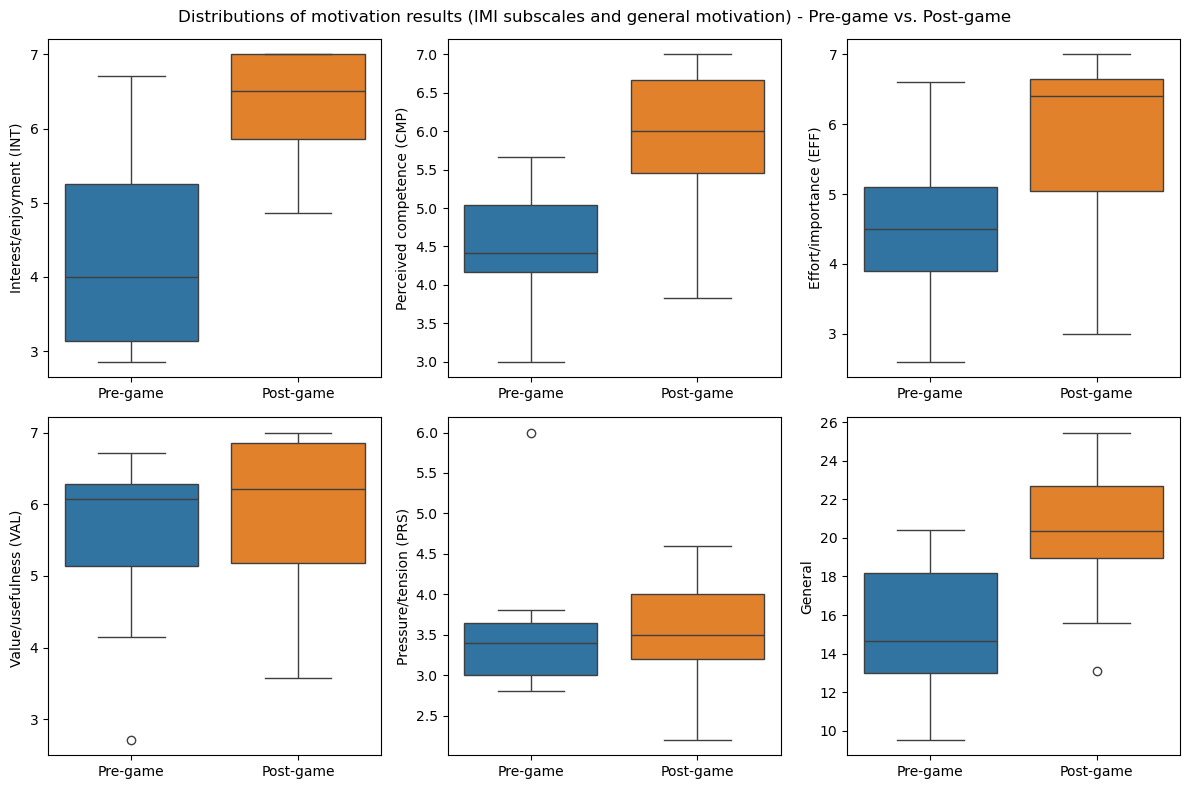

In [78]:
## boxplots

temp_control = experimental_pre_game_test.copy()
temp_control['group'] = 'Pre-game'
temp_experimental = experimental_test.copy()
temp_experimental['group'] = 'Post-game'
all = pd.concat([temp_control, temp_experimental], axis=0)

exp_general = experimental_test.mean(axis=1).to_frame()
exp_general.columns = ['general']
exp_general['group'] = 'Post-game'

control_general = experimental_pre_game_test.mean(axis=1).to_frame()
control_general.columns = ['general']
control_general['group'] = 'Pre-game'
general = pd.concat([control_general, exp_general], axis=0)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

sns.boxplot(x='group', y='interest_enjoyment', hue='group', data=all, ax=axs[0, 0])
axs[0, 0].set_ylabel('Interest/enjoyment (INT)')
axs[0, 0].set_xlabel('')

sns.boxplot(x='group', y='perceived_competence', hue='group', data=all, ax=axs[0, 1])
axs[0, 1].set_ylabel('Perceived competence (CMP)')
axs[0, 1].set_xlabel('')

sns.boxplot(x='group', y='effort_importance', hue='group', data=all, ax=axs[0, 2])
axs[0, 2].set_ylabel('Effort/importance (EFF)')
axs[0, 2].set_xlabel('')

sns.boxplot(x='group', y='value_usefulness', hue='group', data=all, ax=axs[1, 0])
axs[1, 0].set_ylabel('Value/usefulness (VAL) ')
axs[1, 0].set_xlabel('')

sns.boxplot(x='group', y='pressure_tension', hue='group', data=all, ax=axs[1, 1])
axs[1, 1].set_ylabel('Pressure/tension (PRS)')
axs[1, 1].set_xlabel('')

sns.boxplot(x='group', y='general_motivation', hue='group', data=all, ax=axs[1, 2])
axs[1, 2].set_ylabel('General')
axs[1, 2].set_xlabel('')

plt.suptitle('Distributions of motivation results (IMI subscales and general motivation) - Pre-game vs. Post-game')
plt.tight_layout()
figures_path = Path('../figures')
figures_path.mkdir(exist_ok=True)

plt.savefig(figures_path / 'boxplots_imi_pre_x_post.pdf', bbox_inches='tight', dpi=300)
plt.show()

### Realização dos testes

In [79]:
from scipy.stats import shapiro, ttest_rel, wilcoxon
import numpy as np
import pandas as pd

# Teste de normalidade (Shapiro-Wilk, limitado a 5000 amostras)
def testar_normalidade(coluna, alpha=0.05):
    if len(coluna) > 5000:
        coluna = coluna.sample(5000, random_state=42)
    stat, p = shapiro(coluna)
    return p > alpha, p  # True = normal

# Cohen's d para dados pareados
def cohen_d_pareado(x, y):
    diffs = np.array(x) - np.array(y)
    return np.mean(diffs) / np.std(diffs, ddof=1)

# Effect size r para Wilcoxon (Rosenthal r = Z / sqrt(N))
def wilcoxon_r(x, y):
    stat, p = wilcoxon(x, y)
    n = len(x)
    # aproximação de Z a partir da estatística de Wilcoxon
    mean_w = n * (n + 1) / 4
    sd_w = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_w) / sd_w
    return z / np.sqrt(n)

# Interpretação qualitativa do tamanho de efeito
def interpretar_effect_size(valor, tipo):
    abs_val = abs(valor)
    if tipo == 'Cohen':
        if abs_val < 0.2:
            return "pequeno"
        elif abs_val < 0.5:
            return "médio"
        else:
            return "grande"
    elif tipo == 'Wilcoxon-r':
        if abs_val < 0.1:
            return "pequeno"
        elif abs_val < 0.3:
            return "médio"
        else:
            return "grande"

# Interpretação do valor-p
def interpretar_p_valor(p, alpha=0.05):
    if p < alpha:
        return f"Diferença estatisticamente significativa (p = {p:.3f} < {alpha})"
    else:
        return f"Diferença não significativa (p = {p:.3f} ≥ {alpha})"

# Função principal de comparação para testes pareados
def comparar_grupos_pareados(coluna_nome, experimental, control, alpha=0.05):
    diffs = experimental.values - control.values
    normal, p_norm = testar_normalidade(diffs, alpha)

    if normal:
        stat, p = ttest_rel(experimental, control)
        teste = "t de Student (pareado)"
        effect = cohen_d_pareado(experimental, control)
        effect_tipo = "Cohen"
    else:
        stat, p = wilcoxon(experimental, control)
        teste = "Wilcoxon signed-rank"
        effect = wilcoxon_r(experimental, control)
        effect_tipo = "Wilcoxon-r"

    resultado = "iguais" if p > alpha else "diferentes"
    interpretacao_effect = interpretar_effect_size(effect, effect_tipo)
    interpretacao_p = interpretar_p_valor(p, alpha)

    # print("Média experimental:", np.mean(experimental), "Média controle:", np.mean(control))
    # print(f'{coluna_nome} - {teste} => Distribuições {resultado} (p={p:.3f})')
    # print(f'  → {interpretacao_p}')
    # print(f'  → Effect size ({effect_tipo}): {effect:.3f} ({interpretacao_effect})\n')

    return {
        "coluna": coluna_nome,
        "Média_Experimental": np.mean(experimental),
        "Média_Controle": np.mean(control),
        "teste_utilizado": teste,
        "p_valor": p,
        "interpretacao_p_valor": interpretacao_p,
        "resultado": resultado,
        "effect_size": effect,
        "tipo_effect_size": effect_tipo,
        "interpretacao_effect_size": interpretacao_effect
    }, {
        "coluna": coluna_nome,
        "p_normalidade_diffs": p_norm,
        "normalidade_diffs": normal
    }

# Executa comparações e armazena resultados
resultados = []
normalidade = []

for col in list(experimental_test.columns):
    experimental_col = experimental_test[col]
    experimental_pre_col = experimental_pre_game_test[col]

    resultado, norm = comparar_grupos_pareados(col, experimental_col, experimental_pre_col)
    resultados.append(resultado)
    normalidade.append(norm)

# Overall (média das dimensões)
# overall_experimental_pre = experimental_pre_game_test.mean(axis=1)
# overall_experimental = experimental_test.mean(axis=1)

# resultado, norm = comparar_grupos_pareados("Overall", overall_experimental, overall_experimental_pre)
# resultados.append(resultado)
# normalidade.append(norm)

# DataFrames de resultados
df_resultados = pd.DataFrame(resultados)
df_normalidade = pd.DataFrame(normalidade)

In [80]:
df_normalidade

,coluna,p_normalidade_diffs,normalidade_diffs
0,interest_enjoyment,0.560087,True
1,perceived_competence,0.700346,True
2,effort_importance,0.534569,True
3,value_usefulness,0.748670,True
4,pressure_tension,0.015633,False
5,general_motivation,0.675680,True


In [81]:
df_resultados

,coluna,Média_Experimental,Média_Controle,teste_utilizado,p_valor,interpretacao_p_valor,resultado,effect_size,tipo_effect_size,interpretacao_effect_size
0,interest_enjoyment,6.339286,4.357143,t de Student (pareado),0.000006,Diferença estatisticamente significativa (p = ...,diferentes,1.708110,Cohen,grande
1,perceived_competence,5.885417,4.427083,t de Student (pareado),0.000033,Diferença estatisticamente significativa (p = ...,diferentes,1.456985,Cohen,grande
2,effort_importance,5.750000,4.437500,t de Student (pareado),0.001783,Diferença estatisticamente significativa (p = ...,diferentes,0.947256,Cohen,grande
3,value_usefulness,5.910714,5.589286,t de Student (pareado),0.084111,Diferença não significativa (p = 0.084 ≥ 0.05),iguais,0.462502,Cohen,médio
4,pressure_tension,3.512500,3.500000,Wilcoxon signed-rank,0.489211,Diferença não significativa (p = 0.489 ≥ 0.05),iguais,-0.342571,Wilcoxon-r,grande
5,general_motivation,20.372917,15.311012,t de Student (pareado),0.000003,Diferença estatisticamente significativa (p = ...,diferentes,1.819318,Cohen,grande
